Bank Additional

About Dataset
Abstract

The data is related to direct marketing campaign direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

# Outline

`1)Dataset`:
* I) read dataset
* II) basic information
* III) Duplicated
* IV) find and handling Missing values

`2)Exploratory Data Analysis & Visualization`
* I) y
* II) Marital
* III) Education
* IV) Housing Loan
* V) Personal Loan
* VI) Contact
* VII) Month
* VIII) Day
* IX) Campaign
* X) Age
* XI) job
* XII) Balance
* XIII) distribution of numeric data
* XIV) education - balance - y
* XV) job - balance - y
* XVI) education - balance - y
* XVII) Correlation

`3)Pre-processing`
* I) Encoding data
* II) Standardization
* III) Train Test Split

`4)Classification Model Supervised`
* I) Non Logistic Regression
* II) Stochastic Gradient Descent
* III) ***
* IV) Support Vector Machin
* V) K-Nearest Neughbors
* VI) Decision Tree
* VII)  ensemble learning: Bagging
* VIII)  ensemble learning: Random Forest
* IX)  ensemble learning: Ada Boost
*  X) ***
* XI) Voting
* XII) Staacking

`5)Final Evaluation`

`6)Finally`

`7)+`

`8)Neural Network with Keras`

#  `Import`

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# `1) Dataset`

#### `1.I) read dataset `

In [66]:
df = pd.read_csv(r'/content/bank-additional.csv')
display(df.head())
df.shape


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


(11162, 17)

#### `1.II) basic information `

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [68]:
df.select_dtypes(include='int64')

,age,balance,day,duration,campaign,pdays,previous
0,59,2343,5,1042,1,-1,0
1,56,45,5,1467,1,-1,0
2,41,1270,5,1389,1,-1,0
3,55,2476,5,579,1,-1,0
4,54,184,5,673,2,-1,0
...,...,...,...,...,...,...,...
11157,33,1,20,257,1,-1,0
11158,39,733,16,83,4,-1,0
11159,32,29,19,156,2,-1,0
11160,43,0,8,9,2,172,5


In [69]:
df.select_dtypes(include='object')

,job,marital,education,default,housing,loan,contact,month,poutcome,deposit
0,admin.,married,secondary,no,yes,no,unknown,may,unknown,yes
1,admin.,married,secondary,no,no,no,unknown,may,unknown,yes
2,technician,married,secondary,no,yes,no,unknown,may,unknown,yes
3,services,married,secondary,no,yes,no,unknown,may,unknown,yes
4,admin.,married,tertiary,no,no,no,unknown,may,unknown,yes
...,...,...,...,...,...,...,...,...,...,...
11157,blue-collar,single,primary,no,yes,no,cellular,apr,unknown,no
11158,services,married,secondary,no,no,no,unknown,jun,unknown,no
11159,technician,single,secondary,no,no,no,cellular,aug,unknown,no
11160,technician,married,secondary,no,no,yes,cellular,may,failure,no


In [70]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,11162.0,41.231948,11.913369,18.0,32.0,39.0,49.00,95.0
balance,11162.0,1528.538524,3225.413326,-6847.0,122.0,550.0,1708.00,81204.0
day,11162.0,15.658036,8.420740,1.0,8.0,15.0,22.00,31.0
duration,11162.0,371.993818,347.128386,2.0,138.0,255.0,496.00,3881.0
campaign,11162.0,2.508421,2.722077,1.0,1.0,2.0,3.00,63.0
pdays,11162.0,51.330407,108.758282,-1.0,-1.0,-1.0,20.75,854.0
previous,11162.0,0.832557,2.292007,0.0,0.0,0.0,1.00,58.0


In [71]:
df.rename(columns={'deposit': 'y'}, inplace=True)
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [72]:
df['y'].value_counts(normalize=True)

,proportion
y,
no,0.52616
yes,0.47384


#### `1.III) Duplicate`

In [73]:
df.duplicated().sum()

0

#### `1.IV) find and handling Missing values`

In [74]:
df.isna().sum()

,0
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0
day,0


In [75]:
pd.DataFrame(df.isin(['unknown']).sum())

,0
age,0
job,70
marital,0
education,497
default,0
balance,0
housing,0
loan,0
contact,2346
day,0


In [76]:
df = df.replace('unknown', np.NAN)

In [77]:
df.isna().sum()

,0
age,0
job,70
marital,0
education,497
default,0
balance,0
housing,0
loan,0
contact,2346
day,0


In [78]:
df.drop(['poutcome'], axis=1, inplace=True)
df.dropna(inplace=True)
df.shape

(8393, 16)

In [79]:
df.isna().sum()

,0
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0
day,0


# `2) Exploratory Data Analysis & Visualization`

#### `2.I) y`

In [ ]:
df['y'].value_counts(normalize=True)

y
yes    0.53771
no     0.46229
Name: proportion, dtype: float64

<Axes: ylabel='count'>

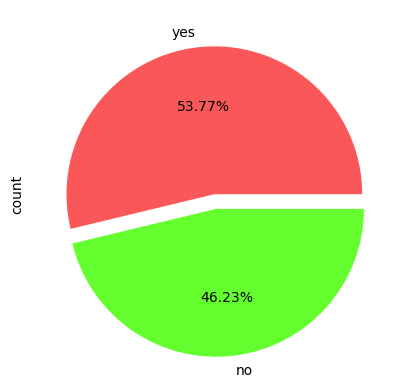

In [ ]:
df['y'].value_counts().plot.pie(explode=[0, 0.10], autopct='%1.2f%%', colors=['#FA5858', '#64FE2E'])

#### `2.II) Marital`

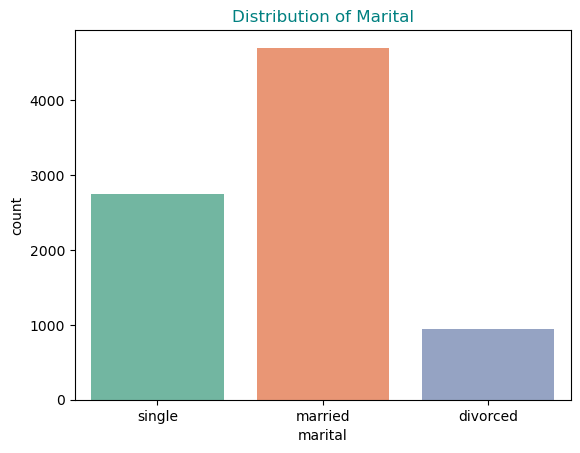

In [ ]:
sns.countplot(data=df, x='marital', palette='Set2')
plt.title('Distribution of Marital', c='teal');

<Axes: ylabel='count'>

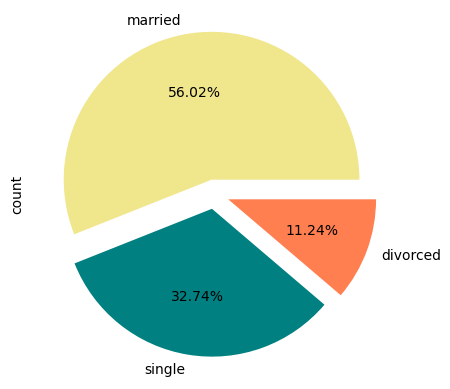

In [ ]:
df['marital'].value_counts().plot.pie(explode=[0.1, 0.10, 0.1], autopct='%1.2f%%', colors=['khaki', 'teal', 'coral'])

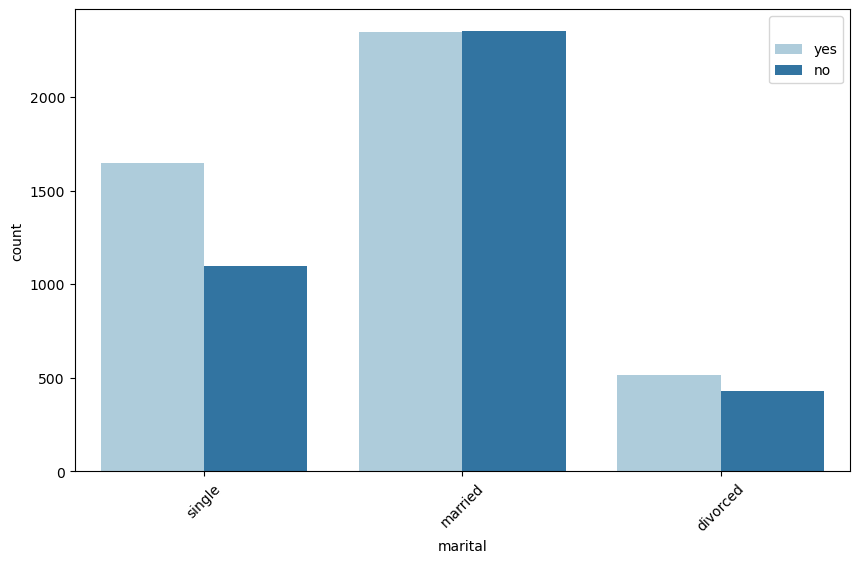

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='marital',hue='y', palette='Paired')
plt.legend(title=' ')
plt.xticks(rotation=45);

#### `2.III) Education`

In [ ]:
df['education'].value_counts()

education
secondary    4178
tertiary     3174
primary      1041
Name: count, dtype: int64

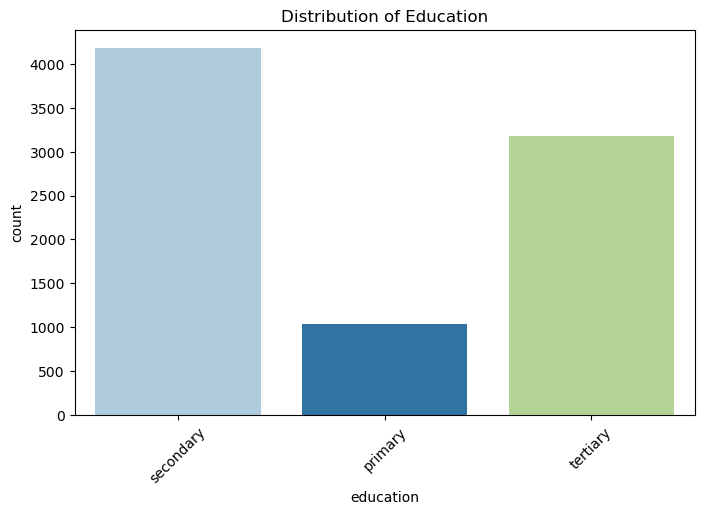

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(df, x='education', palette='Paired')
plt.title('Distribution of Education')
plt.xticks(rotation=45);

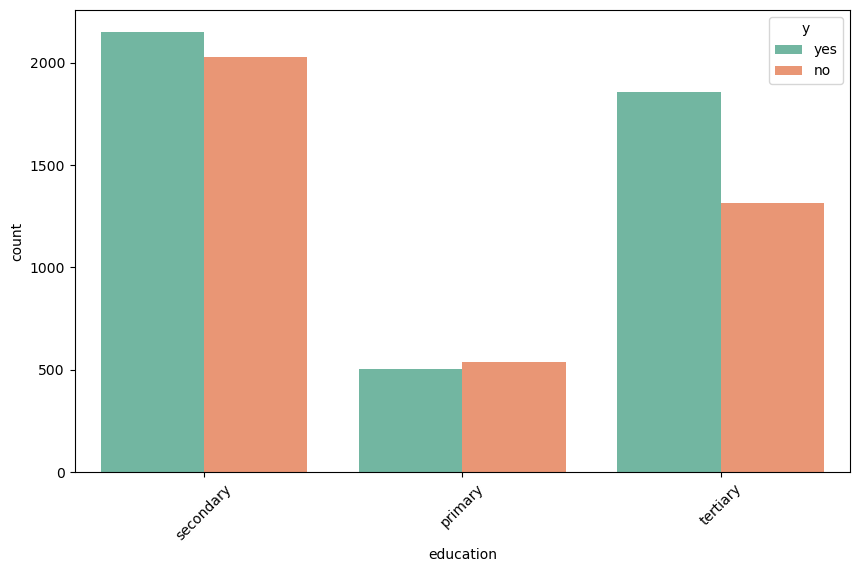

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='education', hue='y', palette='Set2')
plt.legend(title='y')
plt.xticks(rotation=45);

#### `2.IV) Housing Loan`

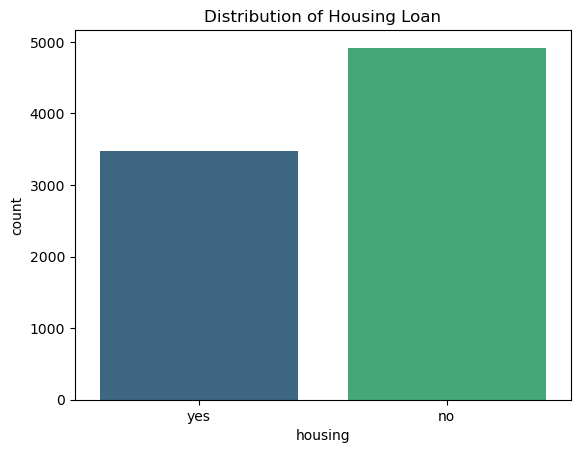

In [ ]:
sns.countplot(data=df, x='housing', palette='viridis')
plt.title('Distribution of Housing Loan');

#### `2.V) Personal Loan`

<Axes: ylabel='count'>

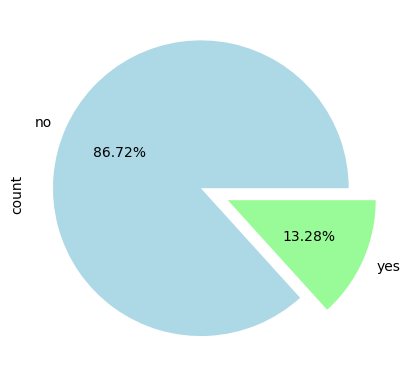

In [ ]:
df['loan'].value_counts().plot.pie(explode=[0.1, 0.10], autopct='%1.2f%%', colors=['lightblue', 'palegreen'])

#### `2.VI) Contact`

In [ ]:
df['contact'].value_counts()

contact
cellular     7692
telephone     701
Name: count, dtype: int64

<Axes: ylabel='count'>

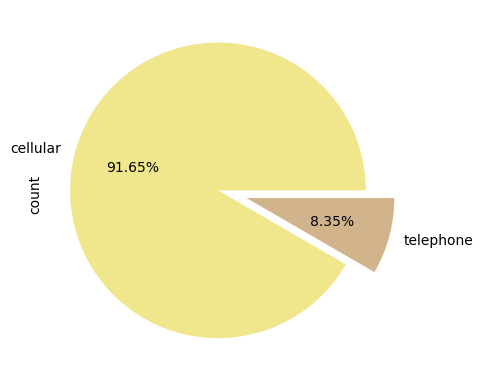

In [ ]:
df['contact'].value_counts().plot.pie(explode=[0.1, 0.10], autopct='%1.2f%%', colors=['khaki', 'tan'])

#### `2.VII) Month`

In [ ]:
df['month'].value_counts()

month
aug    1444
jul    1390
may    1354
nov     893
apr     869
feb     735
jun     394
oct     342
jan     319
sep     287
mar     264
dec     102
Name: count, dtype: int64

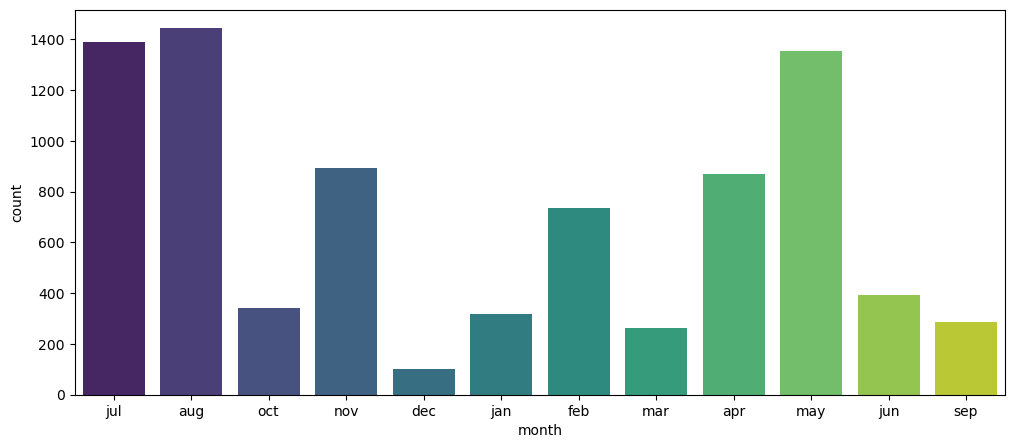

In [ ]:
plt.figure(figsize=(12, 5))
sns.countplot(df, x='month', palette='viridis');

<Axes: ylabel='count'>

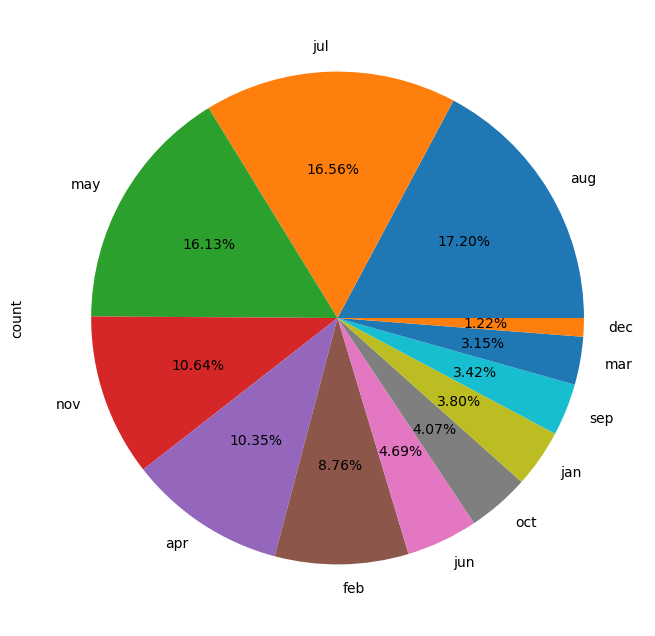

In [ ]:
plt.figure(figsize=(15,8))
df['month'].value_counts().plot.pie(autopct='%1.2f%%')

#### `2.VIII) Day`

In [ ]:
df['day'].value_counts()

day
18    476
15    367
21    364
13    362
14    354
30    352
20    350
17    347
12    344
5     329
8     322
4     320
11    310
7     306
29    292
28    290
6     288
2     258
19    252
22    247
3     237
16    225
9     224
25    212
27    175
23    150
10    147
26    143
31    133
24    114
1     103
Name: count, dtype: int64

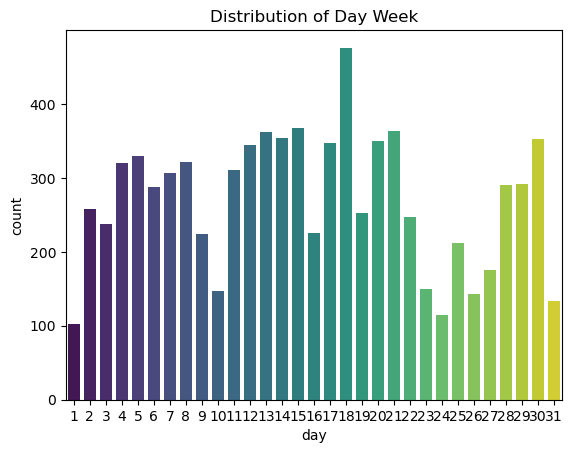

In [ ]:
sns.countplot(data=df, x='day', palette='viridis')
plt.title('Distribution of Day Week');

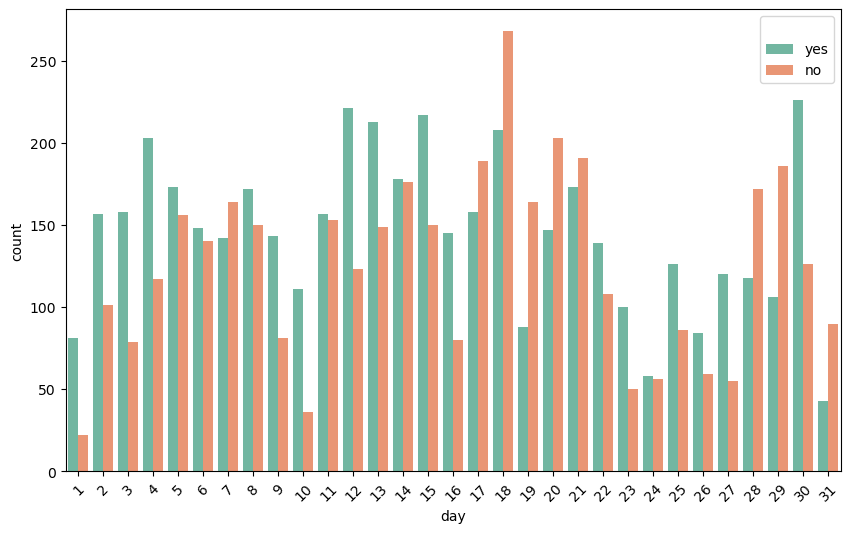

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='day',hue='y', palette='Set2')
plt.legend(title=' ')
plt.xticks(rotation=45);

#### `2.IX) Campaign`

In [ ]:
campaign_counts =  df['campaign'].value_counts()
campaign_counts

campaign
1     3651
2     2285
3      963
4      590
5      290
6      210
7      101
8       97
9       43
10      31
11      24
13      22
12      20
14      10
17       9
21       7
15       6
16       6
24       4
20       4
19       4
22       3
30       3
25       2
18       2
43       1
27       1
23       1
26       1
33       1
29       1
Name: count, dtype: int64

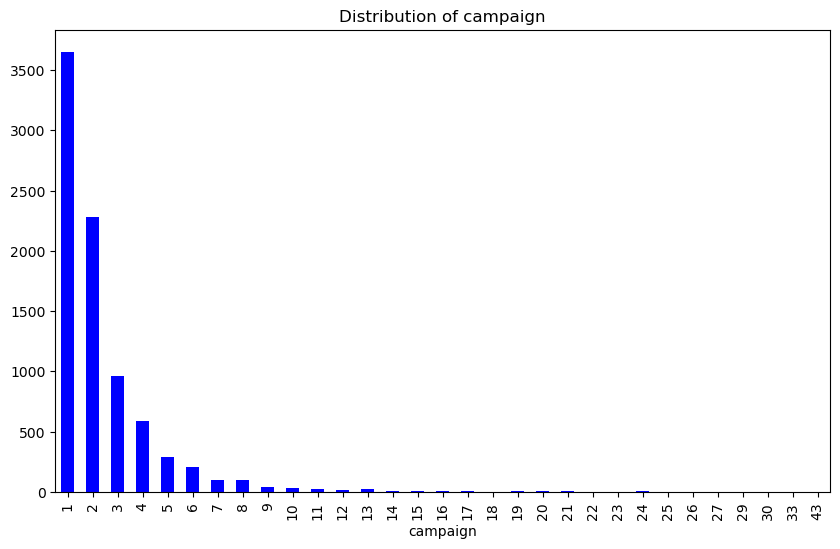

In [ ]:
plt.figure(figsize=(10, 6))
campaign_counts.sort_index().plot(kind='bar', color='b')
plt.title('Distribution of campaign');

#### `2.X) Age`

<Axes: xlabel='age', ylabel='Count'>

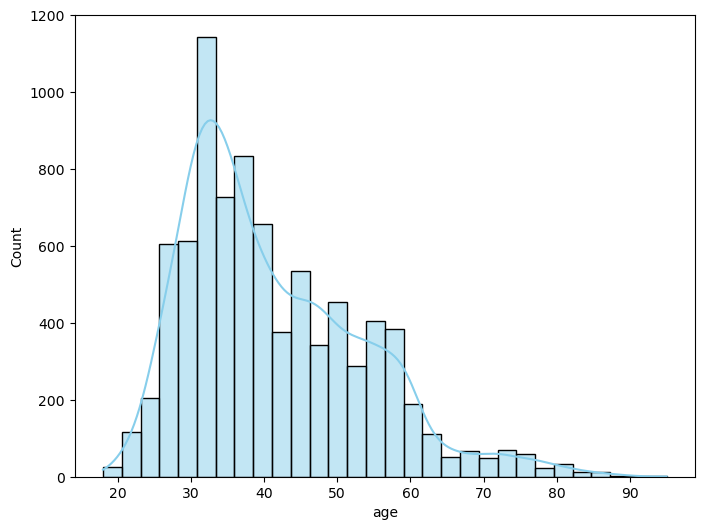

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(df['age'],kde=True, color='skyblue', bins=30)

<Axes: xlabel='age'>

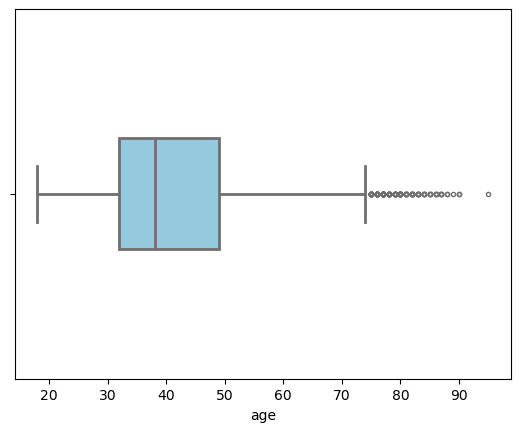

In [ ]:
sns.boxplot(x=df['age'], linewidth=2, width=0.3, color='skyblue', fliersize=3)

In [ ]:
def outlier_numerical (DF, col, target):
    # Numericsl Features
    desc = DF.describe()
    Q1 = desc.loc['25%', col ]
    Q2 = desc.loc['50%', col ]
    Q3 = desc.loc['75%', col ]
    IQR = (Q3 - Q1)
    lower_cap = (Q1 - 1.5 * IQR)
    upper_cap = (Q3 + 1.5 * IQR)
    print ('univariate analysis Outlier value:', col, 'Than', target)
    print ('Q1: ', Q1)
    print ('Q2: ', Q2)
    print ('Q3: ', Q3)
    print ('IQR: ', IQR)
    print ('Lower cap: ', lower_cap)
    print ('Upper cap: ', upper_cap)
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))
    axes[0].boxplot(DF[col])
    axes[0].violinplot(DF[col])
    flag_lower = (DF[col] < lower_cap)
    flag_upper = (DF[col] > upper_cap)
    flag_all = flag_lower | flag_upper
    axes[1].scatter(DF[col], DF[target])
    axes[1].scatter(DF[col][flag_all], DF[target][flag_all])
    return lower_cap, upper_cap

univariate analysis Outlier value: age Than y
Q1:  32.0
Q2:  38.0
Q3:  49.0
IQR:  17.0
Lower cap:  6.5
Upper cap:  74.5


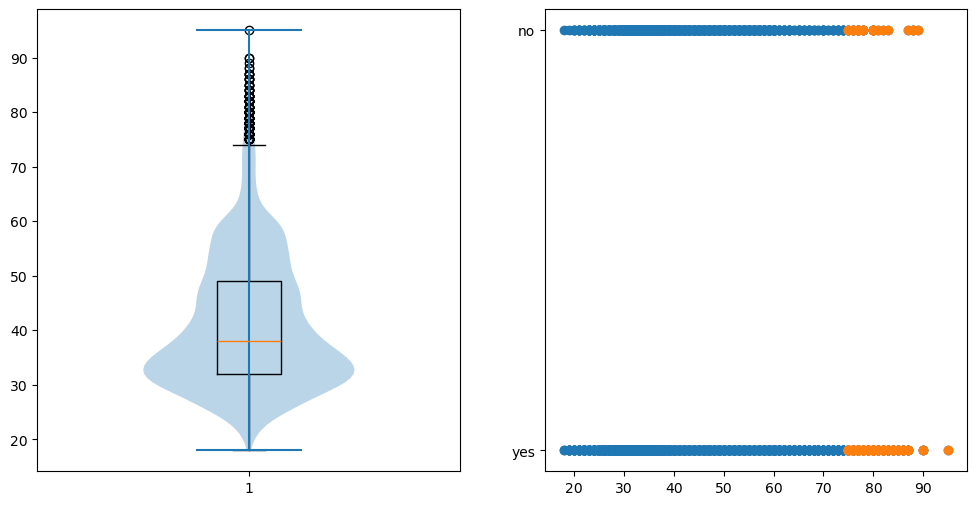

In [ ]:
outlier = outlier_numerical(df, 'age', 'y')

In [ ]:
lower_cap, upper_cap = outlier
df['age'] = np.where(df['age'] < lower_cap, lower_cap, df['age'])
df['age'] = np.where(df['age'] > upper_cap, upper_cap, df['age'])

<Axes: xlabel='age', ylabel='Count'>

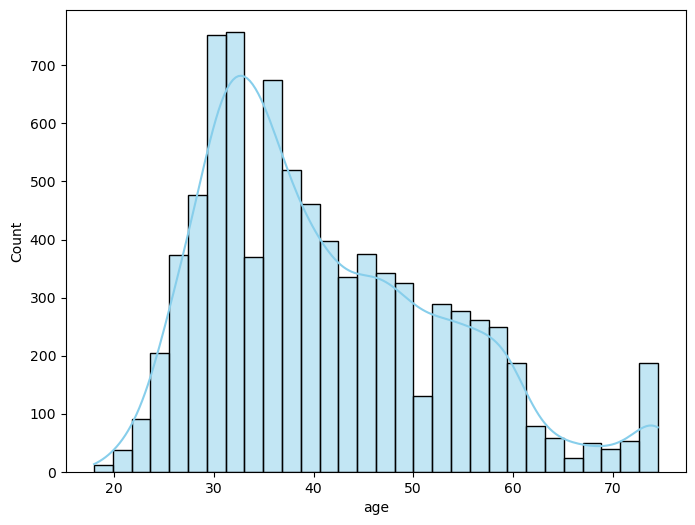

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(df['age'],kde=True, color='skyblue', bins=30)

#### `2.XI) Job`

In [ ]:
df['job'].value_counts()

job
management       2124
technician       1436
blue-collar      1199
admin.           1024
retired           646
services          642
self-employed     309
unemployed        292
student           280
entrepreneur      234
housemaid         207
Name: count, dtype: int64

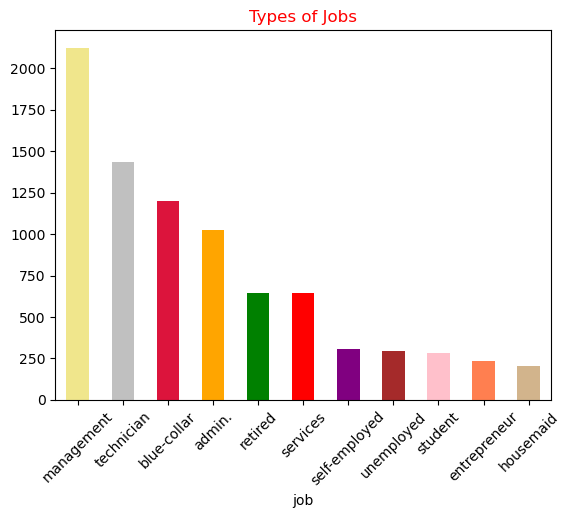

In [ ]:
round(df['job'].value_counts()).plot.bar(color=['khaki', 'silver', 'crimson', 'orange', 'g', 'r', 'purple', 'brown', 'pink', 'coral', 'tan'])
plt.title('Types of Jobs', c='r')
plt.xticks(rotation=45);

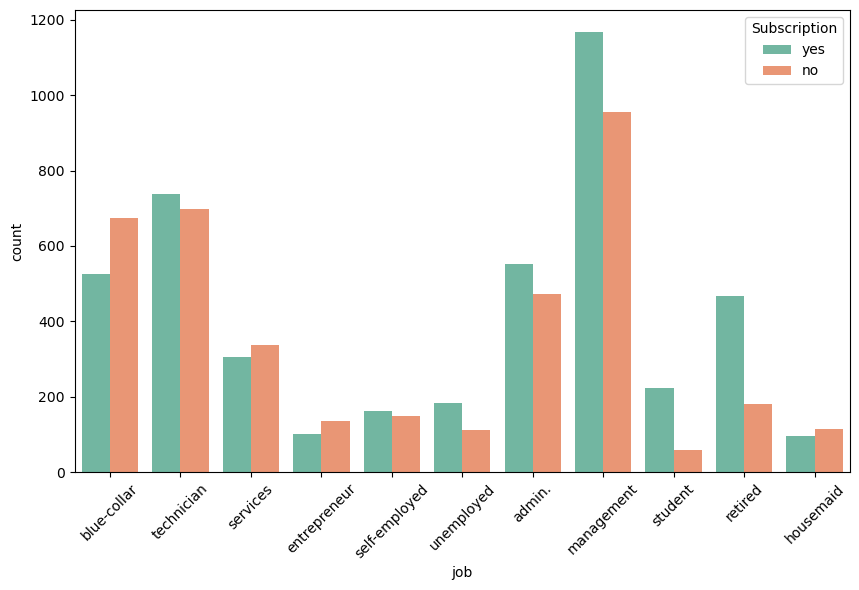

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='job', hue='y', palette='Set2')
plt.xticks(rotation=45)
plt.legend(title='Subscription');

#### `2.XII) balance`

In [ ]:
df['balance'].value_counts()

balance
 0       595
 1        28
 3        26
 2        26
 4        23
        ... 
 4416      1
 1055      1
 3902      1
 6403      1
-72        1
Name: count, Length: 3230, dtype: int64

### `2.XIII) distribution of numeric data `

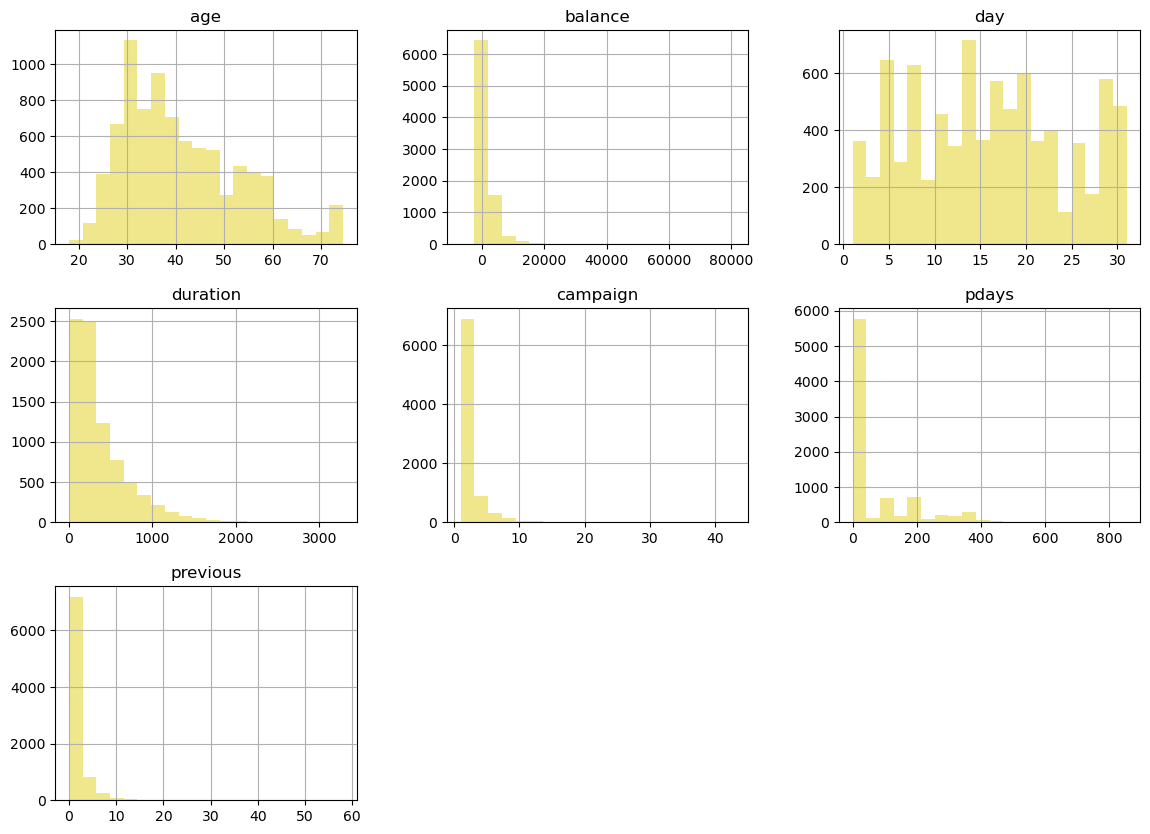

In [ ]:
df.hist(bins=20, figsize=(14, 10), color='khaki');

### `2.XIV) education - balance - y`

<Axes: xlabel='education', ylabel='balance'>

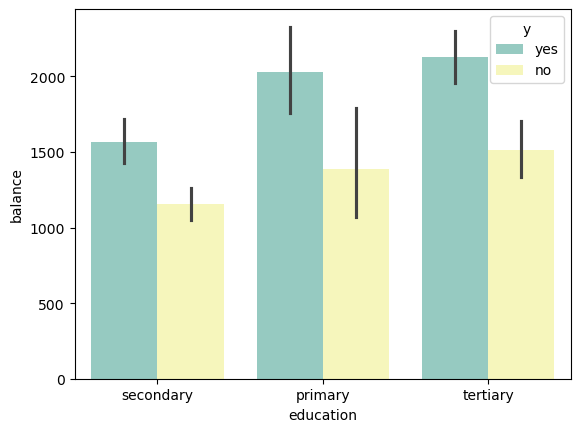

In [ ]:
sns.barplot(data=df, x='education', y='balance', hue='y', palette='Set3')

### `2.XV) job - balance - y`

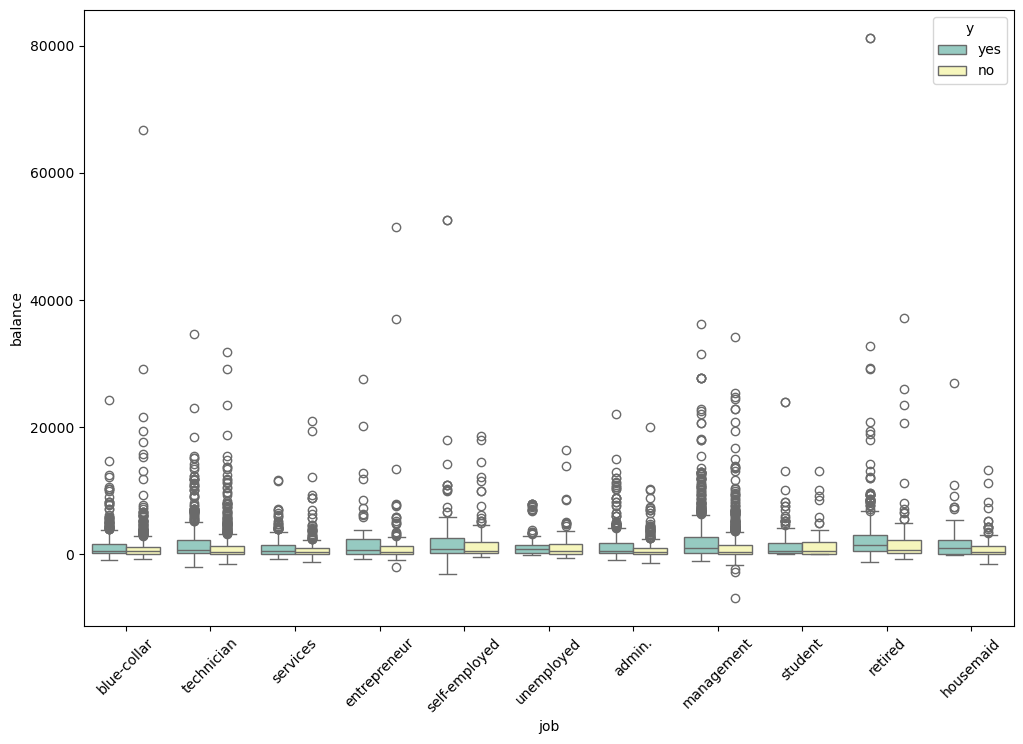

In [ ]:
plt.figure(figsize=(12,8))
sns.boxplot(data=df, x="job", y="balance", hue="y", palette="Set3")
plt.xticks(rotation=45);

### `2.XVI) education - balance - y`

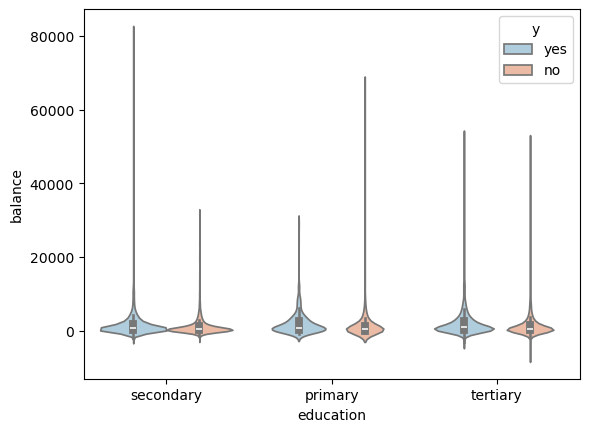

In [ ]:
sns.violinplot(data=df, x="education", y="balance", hue="y", palette="RdBu_r");

### `2.XVII) Correlation`

<Axes: >

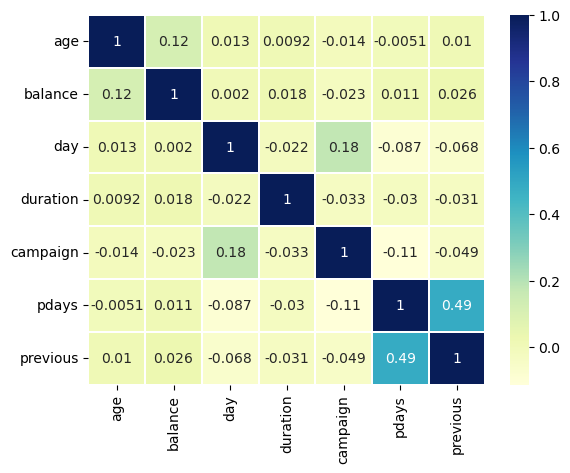

In [ ]:
df_int = df.select_dtypes(include='int64')
sns.heatmap(df_int.corr(), annot=True, linewidths=0.2, linecolor='w', cmap='YlGnBu')

# `3) Pre-processing`

In [80]:
X = df.drop(['y'], axis=1)
y = df['y']
X.shape, y.shape

((8393, 15), (8393,))

In [81]:
y.value_counts()

,count
y,
yes,4513
no,3880


## `3.I) Encoding`

#### `y`

In [82]:
y.replace({"no":0, "yes":1}, inplace=True)
y.value_counts()

,count
y,
1,4513
0,3880


#### `job`

In [83]:
X['job'].value_counts()

,count
job,
management,2124
technician,1436
blue-collar,1199
admin.,1024
retired,646
services,642
self-employed,309
unemployed,292
student,280


In [84]:
job_mapping = {
    'student': 0,
    'unemployed': 1,
    'housemaid': 2,
    'self-employed': 3,
    'entrepreneur': 4,
    'retired': 5,
    'management': 6,
    'services': 7,
    'technician': 8,
    'blue-collar': 9,
    'admin.': 10
}


X['job']=X['job'].map(job_mapping)

In [85]:
X['job'].value_counts()

,count
job,
6,2124
8,1436
9,1199
10,1024
5,646
7,642
3,309
1,292
0,280


#### `marital`

In [86]:
X['marital'].value_counts()

,count
marital,
married,4702
single,2748
divorced,943


In [87]:
marital_mapipng={
    'married':2,
    'single':1,
    'divorced':0,
}
X['marital']=X['marital'].map(marital_mapipng)

In [88]:
X['marital'].value_counts()

,count
marital,
2,4702
1,2748
0,943


#### `education`

In [89]:
X['education'].value_counts()

,count
education,
secondary,4178
tertiary,3174
primary,1041


In [90]:
education_mapipng={
    'primary':0,
    'secondary':1,
    'tertiary':2
}
X['education']=X['education'].map(education_mapipng)

In [91]:
X['education'].value_counts()

,count
education,
1,4178
2,3174
0,1041


#### `housing`

In [92]:
X['housing'].value_counts()

,count
housing,
no,4919
yes,3474


In [93]:
housing_mapipng={
    'yes':1,
    'no':0,
}
X['housing']=X['housing'].map(housing_mapipng)

In [94]:
X['housing'].value_counts()

,count
housing,
0,4919
1,3474


#### `loan`

In [95]:
X['loan'].value_counts()

,count
loan,
no,7278
yes,1115


In [96]:
X['loan'].replace({"no":0, "yes":1}, inplace=True)
X['loan'].value_counts()

,count
loan,
0,7278
1,1115


#### `contact`

In [97]:
X['contact'].value_counts()

,count
contact,
cellular,7692
telephone,701


In [98]:
X['contact'].replace({"cellular":0, "telephone":1}, inplace=True)
X['contact'].value_counts()

,count
contact,
0,7692
1,701


#### `month`

In [99]:
X['month'].value_counts()

,count
month,
aug,1444
jul,1390
may,1354
nov,893
apr,869
feb,735
jun,394
oct,342
jan,319


In [100]:
# تغییر مقادیر بر اساس اینکه جندمین ماه سال است

month_mapping = {
    'jan':1,
    'feb':2,
    'mar':3,
    'apr':4,
    'may':5,
    'jun':6,
    'jul':7,
    'aug':8,
    'sep':9,
    'oct':10,
    'nov':11,
    'dec':12,
}

X['month'] = X['month'].map(month_mapping)

In [101]:
X['month'].value_counts()

,count
month,
8,1444
7,1390
5,1354
11,893
4,869
2,735
6,394
10,342
1,319


#### `default`

In [102]:
X['default'].value_counts()

,count
default,
no,8290
yes,103


In [103]:
X['default'].replace({"no":0, "yes":1}, inplace=True)
X['default'].value_counts()

,count
default,
0,8290
1,103


In [104]:
X.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous
367,28,9,1,1,0,-127,1,0,0,4,7,1044,3,-1,0
368,55,9,2,1,0,49,1,0,0,7,7,494,4,-1,0
369,51,8,2,1,0,216,0,0,0,7,7,615,2,-1,0
370,39,8,1,1,0,506,1,0,0,7,7,718,2,-1,0
371,42,9,0,0,0,213,1,0,0,7,7,434,3,-1,0


In [105]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8393 entries, 367 to 11161
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   age        8393 non-null   int64
 1   job        8393 non-null   int64
 2   marital    8393 non-null   int64
 3   education  8393 non-null   int64
 4   default    8393 non-null   int64
 5   balance    8393 non-null   int64
 6   housing    8393 non-null   int64
 7   loan       8393 non-null   int64
 8   contact    8393 non-null   int64
 9   day        8393 non-null   int64
 10  month      8393 non-null   int64
 11  duration   8393 non-null   int64
 12  campaign   8393 non-null   int64
 13  pdays      8393 non-null   int64
 14  previous   8393 non-null   int64
dtypes: int64(15)
memory usage: 1.0 MB


## `3.II) Standardization`

In [106]:
from sklearn.preprocessing import MinMaxScaler

In [107]:
scaler = MinMaxScaler()

for col in X.columns:
    X[col]=scaler.fit_transform(np.array(X[col]).reshape(-1,1))

In [108]:
X.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous
367,0.129870,0.9,0.5,0.5,0.0,0.076319,1.0,0.0,0.0,0.1,0.545455,0.317489,0.047619,0.0,0.0
368,0.480519,0.9,1.0,0.5,0.0,0.078318,1.0,0.0,0.0,0.2,0.545455,0.149909,0.071429,0.0,0.0
369,0.428571,0.8,1.0,0.5,0.0,0.080215,0.0,0.0,0.0,0.2,0.545455,0.186776,0.023810,0.0,0.0
370,0.272727,0.8,0.5,0.5,0.0,0.083508,1.0,0.0,0.0,0.2,0.545455,0.218160,0.023810,0.0,0.0
371,0.311688,0.9,0.0,0.0,0.0,0.080181,1.0,0.0,0.0,0.2,0.545455,0.131627,0.047619,0.0,0.0


<Axes: >

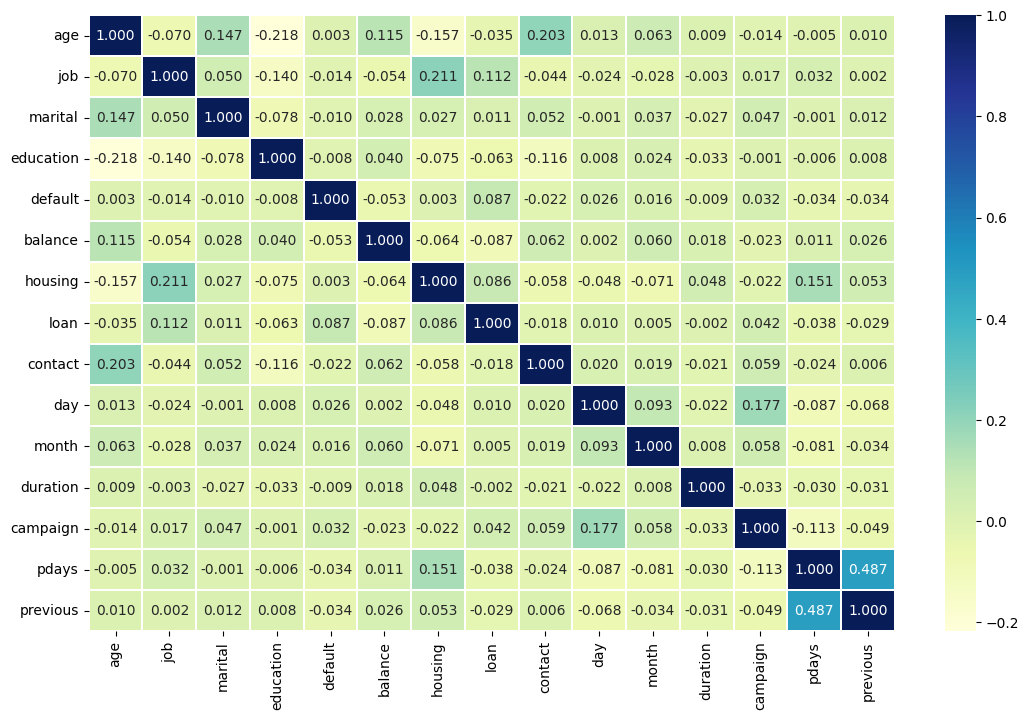

In [109]:
plt.figure(figsize=(13,8))
sns.heatmap(X.corr(), annot=True, linewidths=0.2, linecolor='w', cmap='YlGnBu',fmt='.3f')

In [110]:
#from imblearn.over_sampling import SMOTE

#smote=SMOTE(random_state=42,k_neighbors=21,sampling_strategy=0.9)

#x_train, y_train  = smote.fit_resample(x_train, y_train)
#x_validation, y_validation  = smote.fit_resample(x_validation, y_validation)
#x_test, y_test  = smote.fit_resample(x_test, y_test)

## `3.III) Train Test split`

In [111]:
from sklearn.model_selection import train_test_split

In [112]:
X.shape

(8393, 15)

In [113]:
X_sample, x_, y_sample, y_= train_test_split(X, y, train_size=0.12)
X_sample.shape, y_sample.shape

((1007, 15), (1007,))

In [114]:
x_train, x_test, y_train, y_test = train_test_split(X_sample, y_sample, test_size=0.2, random_state=42)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((805, 15), (805,), (202, 15), (202,))

In [115]:
y_train.value_counts(normalize=True)

,proportion
y,
1,0.565217
0,0.434783


In [116]:
y_test.value_counts(normalize=True)

,proportion
y,
1,0.529703
0,0.470297


# `4) Classification Model Supervised`

In [183]:
# polynomial feature - Non linear
from sklearn.preprocessing import PolynomialFeatures
# randomized search & grid search
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
# cross validation k-fold
from sklearn.model_selection import StratifiedKFold
# evaluation metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, f1_score, recall_score, precision_score, accuracy_score, roc_auc_score, ConfusionMatrixDisplay

### `K-fold`

In [123]:
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

### `4.I) Logistic Regression`

In [275]:
from sklearn.linear_model import LogisticRegression

##### `Randomized Search`

In [386]:
# Definition of parameters
c = np.arange(0.1, 1.5, 0.1)
parameters_logistic_regression = {
                                'C': c,
                                'penalty':['l1', 'l2'],
                                'solver': ['lbfgs', 'liblinear']
                                }
# Create model
logistic_regression = LogisticRegression(max_iter=3000, class_weight='balanced', random_state=42, tol=1e-3)
# use of Randomized SearchCV
random_search_lgistic = RandomizedSearchCV(
    estimator=logistic_regression,
    param_distributions=parameters_logistic_regression,
    n_iter=10,
    cv=5,
    scoring='f1',
    random_state=42
)

# Fit dataset
random_search_lgistic.fit(x_train_poly, y_train)
# Print the best parameter
print('Best parameters: ', random_search_lgistic.best_params_)

Best parameters:  {'solver': 'liblinear', 'penalty': 'l1', 'C': 0.4}


##### `cross validation`

In [444]:
f1_scores_train = []
f1_scores_val = []

for train_index, val_index in kf.split(x_train, y_train):
    x_train_fold, x_val_fold = x_train.iloc[train_index], x_train.iloc[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]
    # best model
    logistic_regression = random_search_lgistic.best_estimator_
    logistic_regression.fit(x_train_fold, y_train_fold)
    # prediction
    y_pred_train = logistic_regression.predict(x_train_fold)
    y_pred_val = logistic_regression.predict(x_val_fold)
    # F1 score
    f1_train = f1_score(y_train_fold, y_pred_train)
    f1_val = f1_score(y_val_fold, y_pred_val)
    f1_scores_train.append(f1_train)
    f1_scores_val.append(f1_val)


# F1 score mean
f1_scores_train_logistic = np.mean(f1_scores_train)
f1_scores_val_logistic = np.mean(f1_scores_val)

data = {'Model_name': [ 'Logistic Regression'],

    'F1_score_train' : [f1_scores_train_logistic],
    'F1_score_validation' : [f1_scores_val_logistic],
       }
result_df = pd.DataFrame(data=data)
result_df

,Model_name,F1_score_train,F1_score_validation
0,Logistic Regression,0.778431,0.771629


### `4.II) Stochastic Gradient Descent Classifier`

In [284]:
from sklearn.linear_model import SGDClassifier

##### `Grid Search`

In [434]:
# Definition of parameters
eta = np.logspace(-3, 0, 10)
alphas0 = np.logspace(-6, 0, 10)

parameters_sgd = {
                'alpha': alphas0,
                'eta0': eta
                }
# Create model
sgd = SGDClassifier(loss ='log_loss', penalty='l2', class_weight='balanced', max_iter=3000, random_state=42, early_stopping=True)
# use of Grid SearchCV
grid_search_sgd = GridSearchCV(sgd, param_grid=parameters_sgd, cv=3)
# Fit dataset
grid_search_sgd.fit(x_train, y_train)
# Print the best parameter
print('Best parameters: ', grid_search_sgd.best_params_)

Best parameters:  {'alpha': 0.00046415888336127773, 'eta0': 0.001}


##### `cross validation`

In [435]:
f1_scores_train = []
f1_scores_val = []

for train_index, val_index in kf.split(x_train, y_train):
    x_train_fold, x_val_fold = x_train.iloc[train_index], x_train.iloc[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]
    # best model
    sgd = grid_search_sgd.best_estimator_
    sgd.fit(x_train_fold, y_train_fold)
    # prediction
    y_pred_train = sgd.predict(x_train_fold)
    y_pred_val = sgd.predict(x_val_fold)
    # F1 score
    f1_train = f1_score(y_train_fold, y_pred_train)
    f1_val = f1_score(y_val_fold, y_pred_val)
    f1_scores_train.append(f1_train)
    f1_scores_val.append(f1_val)


# F1 score mean
f1_scores_train_sgd = np.mean(f1_scores_train)
f1_scores_val_sgd = np.mean(f1_scores_val)

data = {'Model_name': [ 'Logistic Regression'],

    'F1_score_train' : [f1_scores_train_sgd],
    'F1_score_validation' : [f1_scores_val_sgd],
       }
result_df = pd.DataFrame(data=data)
result_df

,Model_name,F1_score_train,F1_score_validation
0,Logistic Regression,0.678391,0.649502


### `4.III) Multi-layer Perceptron`

In [214]:
from sklearn.neural_network import MLPClassifier

In [254]:
mlp = MLPClassifier(hidden_layer_sizes=(20, 15, 10, 5), activation='relu', max_iter=3000)

mlp.fit(x_train, y_train)

MLPClassifier(hidden_layer_sizes=(20, 15, 10, 5), max_iter=3000)

##### `cross validation`

In [304]:
f1_scores_train = []
f1_scores_val = []

for train_index, val_index in kf.split(x_train, y_train):
    x_train_fold, x_val_fold = x_train.iloc[train_index], x_train.iloc[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]
    # model

    mlp.fit(x_train_fold, y_train_fold)
    # prediction
    y_pred_train = mlp.predict(x_train_fold)
    y_pred_val = mlp.predict(x_val_fold)
    # F1 score
    f1_train = f1_score(y_train_fold, y_pred_train)
    f1_val = f1_score(y_val_fold, y_pred_val)
    f1_scores_train.append(f1_train)
    f1_scores_val.append(f1_val)


# F1 score mean
f1_scores_train_mlp= np.mean(f1_scores_train)
f1_scores_val_mlp = np.mean(f1_scores_val)

data = {'Model_name': [ 'Multi-layer Perceptron'],

    'F1_score_train' : [f1_scores_train_mlp],
    'F1_score_validation' : [f1_scores_val_mlp],
       }
result_df = pd.DataFrame(data=data)
result_df

,Model_name,F1_score_train,F1_score_validation
0,Multi-layer Perceptron,0.889349,0.770797


In [ ]:
# mlp : over fit - high variance

### `4.IV) Support Vector Machin`

In [289]:
from sklearn.svm import SVC

In [428]:
svc = SVC(C=0.4, kernel='linear', random_state=42, class_weight='balanced', probability=True)
svc.fit(x_train, y_train)

SVC(C=0.4, class_weight='balanced', kernel='linear', probability=True,
    random_state=42)

##### `cross validation`

In [429]:
f1_scores_train = []
f1_scores_val = []

for train_index, val_index in kf.split(x_train, y_train):
    x_train_fold, x_val_fold = x_train.iloc[train_index], x_train.iloc[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]
    # model

    svc.fit(x_train_fold, y_train_fold)
    # prediction
    y_pred_train = svc.predict(x_train_fold)
    y_pred_val = svc.predict(x_val_fold)
    # F1 score
    f1_train = f1_score(y_train_fold, y_pred_train)
    f1_val = f1_score(y_val_fold, y_pred_val)
    f1_scores_train.append(f1_train)
    f1_scores_val.append(f1_val)


# F1 score mean
f1_scores_train_svc = np.mean(f1_scores_train)
f1_scores_val_svc = np.mean(f1_scores_val)

data = {'Model_name': ['Support Vector Machin'],

    'F1_score_train' : [f1_scores_train_svc],
    'F1_score_validation' : [f1_scores_val_svc],
       }
result_df = pd.DataFrame(data=data)
result_df

,Model_name,F1_score_train,F1_score_validation
0,Support Vector Machin,0.744498,0.737962


### `4.V)  K-Nearest Neighbors`

In [306]:
from sklearn.neighbors import KNeighborsClassifier

##### `Grid Search`

In [430]:
# Definition of parameters
parameters_knn = {
                'n_neighbors': np.arange(35, 50),
                'algorithm': ['ball_tree', 'kd_tree'],
                'metric': ['minkowski', 'manhattan', 'mahalanobis'],
                }
# Create model
knn = KNeighborsClassifier()
# use of Grid SearchCV
grid_search_knn = GridSearchCV(estimator=knn, param_grid=parameters_knn ,cv=3)
# Fit dataset
grid_search_knn.fit(x_train, y_train)
# Print the best parameter
print('Best parameters: ', grid_search_knn.best_params_)

Best parameters:  {'algorithm': 'ball_tree', 'metric': 'manhattan', 'n_neighbors': 44}


##### `cross validation`

In [431]:
f1_scores_train = []
f1_scores_val = []

for train_index, val_index in kf.split(x_train, y_train):
    x_train_fold, x_val_fold = x_train.iloc[train_index], x_train.iloc[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]
    # best model
    knn = grid_search_sgd.best_estimator_
    knn.fit(x_train_fold, y_train_fold)
    # prediction
    y_pred_train = knn.predict(x_train_fold)
    y_pred_val = knn.predict(x_val_fold)
    # F1 score
    f1_train = f1_score(y_train_fold, y_pred_train)
    f1_val = f1_score(y_val_fold, y_pred_val)
    f1_scores_train.append(f1_train)
    f1_scores_val.append(f1_val)


# F1 score mean
f1_scores_train_knn = np.mean(f1_scores_train)
f1_scores_val_knn = np.mean(f1_scores_val)

data = {'Model_name': ['K-Nearest Neighbors'],

    'F1_score_train' : [f1_scores_train_knn],
    'F1_score_validation' : [f1_scores_val_knn],
       }
result_df = pd.DataFrame(data=data)
result_df

,Model_name,F1_score_train,F1_score_validation
0,K-Nearest Neighbors,0.773564,0.767527


### `4.VI) Decision Tree`

In [312]:
from sklearn.tree import DecisionTreeClassifier

##### `Grid Search`

In [314]:
# Definition of parameters
parameters_d_tree = {
                    'min_samples_split' : [40, 50, 60, 70],
                    'max_depth' : [2*n for n in range(1, 10)]
                    }
# Create model
d_tree = DecisionTreeClassifier(criterion='gini', ccp_alpha=1e-5, min_samples_leaf=1, random_state=42)
# use of Grid SearchCV
grid_search_tree = GridSearchCV(estimator=d_tree, param_grid=parameters_d_tree ,cv=3)
# Fit dataset
grid_search_tree.fit(x_train, y_train)
# Print the best parameter
print('Best parameters: ', grid_search_tree.best_params_)

Best parameters:  {'max_depth': 6, 'min_samples_split': 60}


##### `cross validation`

In [315]:
f1_scores_train = []
f1_scores_val = []

for train_index, val_index in kf.split(x_train, y_train):
    x_train_fold, x_val_fold = x_train.iloc[train_index], x_train.iloc[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]
    # best model
    d_tree = grid_search_tree.best_estimator_
    d_tree.fit(x_train_fold, y_train_fold)
    # prediction
    y_pred_train = d_tree.predict(x_train_fold)
    y_pred_val = d_tree.predict(x_val_fold)
    # F1 score
    f1_train = f1_score(y_train_fold, y_pred_train)
    f1_val = f1_score(y_val_fold, y_pred_val)
    f1_scores_train.append(f1_train)
    f1_scores_val.append(f1_val)


# F1 score mean
f1_scores_train_tree = np.mean(f1_scores_train)
f1_scores_val_tree = np.mean(f1_scores_val)

data = {'Model_name': ['Decision Tree'],

    'F1_score_train' : [f1_scores_train_tree],
    'F1_score_validation' : [f1_scores_val_tree],
       }
result_df = pd.DataFrame(data=data)
result_df

,Model_name,F1_score_train,F1_score_validation
0,Decision Tree,0.830891,0.797582


##### `try again`

In [349]:
# Definition of parameters
parameters_d_tree2 = {
                    'min_samples_split' : [2, 3, 4],
                    'max_depth' : [2*n for n in range(1, 10)],
                     'max_leaf_nodes': np.arange(2, 7),
                    }
# Create model
d_tree2 = DecisionTreeClassifier(criterion='log_loss', min_samples_leaf=1, random_state=42)
# use of Grid SearchCV
grid_search_tree2 = GridSearchCV(estimator=d_tree2, param_grid=parameters_d_tree2 ,cv=3)
# Fit dataset
grid_search_tree2.fit(x_train, y_train)
# Print the best parameter
print('Best parameters: ', grid_search_tree2.best_params_)

Best parameters:  {'max_depth': 4, 'max_leaf_nodes': 6, 'min_samples_split': 2}


In [350]:
f1_scores_train = []
f1_scores_val = []

for train_index, val_index in kf.split(x_train, y_train):
    x_train_fold, x_val_fold = x_train.iloc[train_index], x_train.iloc[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]
    # best model
    d_tree2 = grid_search_tree2.best_estimator_
    d_tree2.fit(x_train_fold, y_train_fold)
    # prediction
    y_pred_train = d_tree2.predict(x_train_fold)
    y_pred_val = d_tree2.predict(x_val_fold)
    # F1 score
    f1_train = f1_score(y_train_fold, y_pred_train)
    f1_val = f1_score(y_val_fold, y_pred_val)
    f1_scores_train.append(f1_train)
    f1_scores_val.append(f1_val)


# F1 score mean
f1_scores_train_tree2 = np.mean(f1_scores_train)
f1_scores_val_tree2 = np.mean(f1_scores_val)

data = {'Model_name': ['Decision Tree'],

    'F1_score_train' : [f1_scores_train_tree2],
    'F1_score_validation' : [f1_scores_val_tree2],
       }
result_df = pd.DataFrame(data=data)
result_df

,Model_name,F1_score_train,F1_score_validation
0,Decision Tree,0.788077,0.769368


بعد از تلاش های فراوان بنظرم بهتر شد، البته تلاش هام رو پاک کردم شلوغ نشه :))))

### `4.VII) ensemble learning: Bagging`

In [357]:
from sklearn.ensemble import BaggingClassifier

In [358]:
base_tree_bagging = DecisionTreeClassifier(max_depth=2, random_state=42, ccp_alpha=1e-4)

bagg = BaggingClassifier(estimator=base_tree_bagging, n_estimators=10, max_samples=0.7, oob_score=True, random_state=42)
bagg.fit(x_train, y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(ccp_alpha=0.0001,
                                                   max_depth=2,
                                                   random_state=42),
                  max_samples=0.7, oob_score=True, random_state=42)

##### `cross validation`

In [359]:
f1_scores_train = []
f1_scores_val = []

for train_index, val_index in kf.split(x_train, y_train):
    x_train_fold, x_val_fold = x_train.iloc[train_index], x_train.iloc[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]
    # model

    bagg.fit(x_train_fold, y_train_fold)
    # prediction
    y_pred_train = bagg.predict(x_train_fold)
    y_pred_val = bagg.predict(x_val_fold)
    # F1 score
    f1_train = f1_score(y_train_fold, y_pred_train)
    f1_val = f1_score(y_val_fold, y_pred_val)
    f1_scores_train.append(f1_train)
    f1_scores_val.append(f1_val)


# F1 score mean
f1_scores_train_bagg = np.mean(f1_scores_train)
f1_scores_val_bagg = np.mean(f1_scores_val)

data = {'Model_name': ['Bagging'],

    'F1_score_train' : [f1_scores_train_bagg],
    'F1_score_validation' : [f1_scores_val_bagg],
       }
result_df = pd.DataFrame(data=data)
result_df

,Model_name,F1_score_train,F1_score_validation
0,Bagging,0.78977,0.783362


### `4.VIII) ensemble learning: Random Forest`

In [361]:
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier

##### `Grid Search`

In [364]:
# Definition of parameters
parameters_r_forest= {
                      'min_samples_split' : [10, 20, 30, 40],
                      'max_depth' : [2*n for n in range(5, 10)]
                     }
# Create model
r_forest = ExtraTreesClassifier(n_estimators=10, n_jobs=-1, random_state=42, ccp_alpha=1e-5)
# use of Grid SearchCV
grid_search_forest = GridSearchCV(estimator=r_forest, param_grid=parameters_r_forest ,cv=3)
# Fit dataset
grid_search_forest.fit(x_train, y_train)
# Print the best parameter
print('Best parameters: ', grid_search_forest.best_params_)

Best parameters:  {'max_depth': 16, 'min_samples_split': 20}


##### `cross validation`

In [366]:
f1_scores_train = []
f1_scores_val = []

for train_index, val_index in kf.split(x_train, y_train):
    x_train_fold, x_val_fold = x_train.iloc[train_index], x_train.iloc[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]
    # best model
    r_forest = grid_search_forest.best_estimator_
    r_forest.fit(x_train_fold, y_train_fold)
    # prediction
    y_pred_train = r_forest.predict(x_train_fold)
    y_pred_val = r_forest.predict(x_val_fold)
    # F1 score
    f1_train = f1_score(y_train_fold, y_pred_train)
    f1_val = f1_score(y_val_fold, y_pred_val)
    f1_scores_train.append(f1_train)
    f1_scores_val.append(f1_val)


# F1 score mean
f1_scores_train_forest = np.mean(f1_scores_train)
f1_scores_val_forest = np.mean(f1_scores_val)

data = {'Model_name': ['Random Forest'],

    'F1_score_train' : [f1_scores_train_forest],
    'F1_score_validation' : [f1_scores_val_forest],
       }
result_df = pd.DataFrame(data=data)
result_df

,Model_name,F1_score_train,F1_score_validation
0,Random Forest,0.897691,0.795875


In [ ]:
# Random Forest: overfit - high variance

##### `try again`

In [372]:
# Definition of parameters
parameters_r_forest2= {
                      'min_samples_split' : [5, 10, 20],
                      'max_depth' : [2*n for n in range(5, 10)],
                      'criterion' : ['gini', 'entropy', 'log_loss'],
                      'max_leaf_nodes' : np.arange(2, 8)
                     }
# Create model
r_forest2 = ExtraTreesClassifier(n_estimators=100, n_jobs=-1, random_state=42, ccp_alpha=0.0)
# use of Grid SearchCV
grid_search_forest2 = GridSearchCV(estimator=r_forest2, param_grid=parameters_r_forest2 ,cv=3)
# Fit dataset
grid_search_forest2.fit(x_train, y_train)
# Print the best parameter
print('Best parameters: ', grid_search_forest2.best_params_)

Best parameters:  {'criterion': 'gini', 'max_depth': 10, 'max_leaf_nodes': 4, 'min_samples_split': 20}


In [373]:
f1_scores_train = []
f1_scores_val = []

for train_index, val_index in kf.split(x_train, y_train):
    x_train_fold, x_val_fold = x_train.iloc[train_index], x_train.iloc[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]
    # best model
    r_forest2 = grid_search_forest2.best_estimator_
    r_forest2.fit(x_train_fold, y_train_fold)
    # prediction
    y_pred_train = r_forest2.predict(x_train_fold)
    y_pred_val = r_forest2.predict(x_val_fold)
    # F1 score
    f1_train = f1_score(y_train_fold, y_pred_train)
    f1_val = f1_score(y_val_fold, y_pred_val)
    f1_scores_train.append(f1_train)
    f1_scores_val.append(f1_val)


# F1 score mean
f1_scores_train_forest2 = np.mean(f1_scores_train)
f1_scores_val_forest2 = np.mean(f1_scores_val)

data = {'Model_name': ['Random Forest'],

    'F1_score_train' : [f1_scores_train_forest2],
    'F1_score_validation' : [f1_scores_val_forest2],
       }
result_df = pd.DataFrame(data=data)
result_df

,Model_name,F1_score_train,F1_score_validation
0,Random Forest,0.778984,0.769925


### `4.IX) ensemble learning: Ada Boost`

In [374]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [382]:
# Definition of tree
base_tree_ada = DecisionTreeClassifier(max_depth=1, max_leaf_nodes=2)
# Create model
ada = AdaBoostClassifier(estimator=base_tree_ada, n_estimators=25, learning_rate=0.01, random_state=42)
# Fit dataset
ada.fit(x_train, y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1,
                                                    max_leaf_nodes=2),
                   learning_rate=0.01, n_estimators=25, random_state=42)

##### `cross validation`

In [383]:
f1_scores_train = []
f1_scores_val = []

for train_index, val_index in kf.split(x_train, y_train):
    x_train_fold, x_val_fold = x_train.iloc[train_index], x_train.iloc[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]
    # model

    ada.fit(x_train_fold, y_train_fold)
    # prediction
    y_pred_train = ada.predict(x_train_fold)
    y_pred_val = ada.predict(x_val_fold)
    # F1 score
    f1_train = f1_score(y_train_fold, y_pred_train)
    f1_val = f1_score(y_val_fold, y_pred_val)
    f1_scores_train.append(f1_train)
    f1_scores_val.append(f1_val)


# F1 score mean
f1_scores_train_ada = np.mean(f1_scores_train)
f1_scores_val_ada = np.mean(f1_scores_val)

data = {'Model_name': ['Ada Boost'],

    'F1_score_train' : [f1_scores_train_ada],
    'F1_score_validation' : [f1_scores_val_ada],
       }
result_df = pd.DataFrame(data=data)
result_df

,Model_name,F1_score_train,F1_score_validation
0,Ada Boost,0.749627,0.722531


##### `cross validation`

### `4.XI) Voting`

In [493]:
from sklearn.ensemble import VotingClassifier

In [496]:
voting = VotingClassifier(estimators=[
                        ('LogisticR egression', logistic_regression),
                        ('SGD Classifier', sgd),
                        ('SVC', svc),
                       ('K Nearest Neighbors', knn),
                        ('Decision Tree', d_tree2),
                        ('Bagging', bagg),
                        ('Random Forest', r_forest2),
                        ('Ada Boost', ada),

                                    ],
                        voting='soft'
                        )

voting.fit(x_train, y_train)

VotingClassifier(estimators=[('LogisticR egression',
                              LogisticRegression(C=0.4, class_weight='balanced',
                                                 max_iter=3000, penalty='l1',
                                                 random_state=42,
                                                 solver='liblinear',
                                                 tol=0.001)),
                             ('SGD Classifier',
                              SGDClassifier(alpha=0.00046415888336127773,
                                            class_weight='balanced',
                                            early_stopping=True, eta0=0.001,
                                            loss='log_loss', max_iter=3000,
                                            random_state=42)),
                             ('SVC',
                              SVC(C=...
                                                                                 max_depth=2,
                                                                                 random_state=42),
                                                max_samples=0.7, oob_score=True,
                                                random_state=42)),
                             ('Random Forest',
                              ExtraTreesClassifier(max_depth=10,
                                                   max_leaf_nodes=4,
                                                   min_samples_split=20,
                                                   n_jobs=-1,
                                                   random_state=42)),
                             ('Ada Boost',
                              AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1,
                                                                                  max_leaf_nodes=2),
                                                 learning_rate=0.01,
                                                 n_estimators=25,
                                                 random_state=42))],
                 voting='soft')

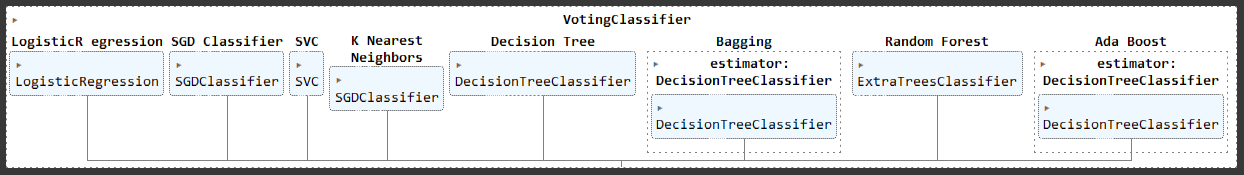

In [498]:
from IPython.display import Image
Image(filename=r'/content/voting.PNG')

In [497]:
f1_scores_train = []
f1_scores_val = []

for train_index, val_index in kf.split(x_train, y_train):
    x_train_fold, x_val_fold = x_train.iloc[train_index], x_train.iloc[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]
    # model

    voting.fit(x_train_fold, y_train_fold)
    # prediction
    y_pred_train = voting.predict(x_train_fold)
    y_pred_val = voting.predict(x_val_fold)
    # F1 score
    f1_train = f1_score(y_train_fold, y_pred_train)
    f1_val = f1_score(y_val_fold, y_pred_val)
    f1_scores_train.append(f1_train)
    f1_scores_val.append(f1_val)


# F1 score mean
f1_scores_train_voting = np.mean(f1_scores_train)
f1_scores_val_voting = np.mean(f1_scores_val)

data = {'Model_name': ['Voting'],

    'F1_score_train' : [f1_scores_train_voting],
    'F1_score_validation' : [f1_scores_val_voting],
       }
result_df = pd.DataFrame(data=data)
result_df

,Model_name,F1_score_train,F1_score_validation
0,Voting,0.80424,0.785762


### `4.XII) Stacking`

In [409]:
from sklearn.ensemble import StackingClassifier

In [414]:
stacking = StackingClassifier(estimators=[
                        ('LogisticR egression', logistic_regression),
                        ('SGD Classifier', sgd),
                        ('SVC', svc),
                        ('K Nearest Neighbors', knn),
                        ('Decision Tree', d_tree2),
                        ('Bagging', bagg),
                        ('Random Forest', r_forest2),
                        ('Ada Boost', ada),
                                        ],
                        final_estimator = LogisticRegression(random_state=42)
                              )

stacking.fit(x_train, y_train)

StackingClassifier(estimators=[('LogisticR egression',
                                LogisticRegression(class_weight='balanced',
                                                   max_iter=3000,
                                                   random_state=42,
                                                   tol=0.001)),
                               ('SGD Classifier',
                                SGDClassifier(class_weight='balanced',
                                              loss='log_loss', max_iter=3000,
                                              random_state=42, tol=0.0001)),
                               ('SVC',
                                SGDClassifier(alpha=0.00046415888336127773,
                                              class_weight='balanced',
                                              eta0=0.001, loss='log_los...
                                                  max_samples=0.7,
                                                  oob_score=True,
                                                  random_state=42)),
                               ('Random Forest',
                                ExtraTreesClassifier(max_depth=10,
                                                     max_leaf_nodes=4,
                                                     min_samples_split=20,
                                                     n_jobs=-1,
                                                     random_state=42)),
                               ('Ada Boost',
                                AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1,
                                                                                    max_leaf_nodes=2),
                                                   learning_rate=0.01,
                                                   n_estimators=25,
                                                   random_state=42))],
                   final_estimator=LogisticRegression(random_state=42))

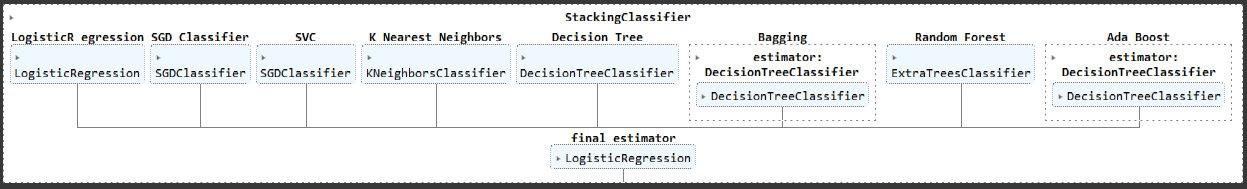

In [417]:
from IPython.display import Image
Image(filename=r'/content/Stacking_model.PNG')

##### `cross validation`

In [415]:
f1_scores_train = []
f1_scores_val = []

for train_index, val_index in kf.split(x_train, y_train):
    x_train_fold, x_val_fold = x_train.iloc[train_index], x_train.iloc[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]
    # model

    stacking.fit(x_train_fold, y_train_fold)
    # prediction
    y_pred_train = stacking.predict(x_train_fold)
    y_pred_val = stacking.predict(x_val_fold)
    # F1 score
    f1_train = f1_score(y_train_fold, y_pred_train)
    f1_val = f1_score(y_val_fold, y_pred_val)
    f1_scores_train.append(f1_train)
    f1_scores_val.append(f1_val)


# F1 score mean
f1_scores_train_stacking = np.mean(f1_scores_train)
f1_scores_val_stacking = np.mean(f1_scores_val)

data = {'Model_name': ['Stacking'],

    'F1_score_train' : [f1_scores_train_stacking],
    'F1_score_validation' : [f1_scores_val_stacking],
       }
result_df = pd.DataFrame(data=data)
result_df

,Model_name,F1_score_train,F1_score_validation
0,Stacking,0.814745,0.79183


# `5) Final Evaluation`

### `5.I) Dataframe`

In [451]:
data = {'Model_name': [ 'Logistic Regression',
                     'SGD Classifier',
                     'SVC',
                     'K Nearest Neighbors',
                     'Decision Tree',
                     'Bagging',
                     'Random Forest',
                     'Ada Boost',
                     'Stacking'
                     ],

    'F1 score train' : [f1_scores_train_logistic, f1_scores_train_sgd, f1_scores_train_svc, f1_scores_train_knn, f1_scores_train_tree2, f1_scores_train_bagg, f1_scores_train_forest2, f1_scores_train_ada, f1_scores_train_stacking],
    'F1 score validation' : [f1_scores_val_logistic, f1_scores_val_sgd, f1_scores_val_svc, f1_scores_val_knn, f1_scores_val_tree2, f1_scores_val_bagg, f1_scores_val_forest2, f1_scores_val_ada, f1_scores_val_stacking],
        'difference' : [f1_scores_train_logistic-f1_scores_val_logistic, f1_scores_train_sgd-f1_scores_val_sgd, f1_scores_train_svc-f1_scores_val_svc, f1_scores_train_knn-f1_scores_val_knn, f1_scores_train_tree2-f1_scores_val_tree2,
                        f1_scores_train_bagg-f1_scores_val_bagg, f1_scores_train_forest2-f1_scores_val_forest2, f1_scores_train_ada-f1_scores_val_ada, f1_scores_train_stacking-f1_scores_val_stacking]
       }
result_df = pd.DataFrame(data=data)
result_df

,Model_name,F1 score train,F1 score validation,difference
0,Logistic Regression,0.778431,0.771629,0.006802
1,SGD Classifier,0.678391,0.649502,0.028889
2,SVC,0.744498,0.737962,0.006535
3,K Nearest Neighbors,0.773564,0.767527,0.006037
4,Decision Tree,0.788077,0.769368,0.018710
5,Bagging,0.789770,0.783362,0.006408
6,Random Forest,0.778984,0.769925,0.009060
7,Ada Boost,0.749627,0.722531,0.027096
8,Stacking,0.814745,0.791830,0.022915


### `5.II) F1 Score`

In [439]:
result_df1 = result_df.sort_values(by=['F1 score train'], ascending=False)
result_df1

,Model_name,F1 score train,F1 score validation,difference
8,Stacking,0.814745,0.791830,0.022915
5,Bagging,0.789770,0.783362,0.006408
4,Decision Tree,0.788077,0.769368,0.018710
6,Random Forest,0.778984,0.769925,0.009060
0,Logistic Regression,0.778431,0.771629,0.006802
3,K Nearest Neighbors,0.773564,0.767527,0.006037
7,Ada Boost,0.749627,0.722531,0.027096
2,SVC,0.744498,0.737962,0.006535
1,SGD Classifier,0.678391,0.649502,0.028889


In [461]:
result_df1[:1]

,Model_name,F1 score train,F1 score validation,difference
8,Stacking,0.814745,0.79183,0.022915


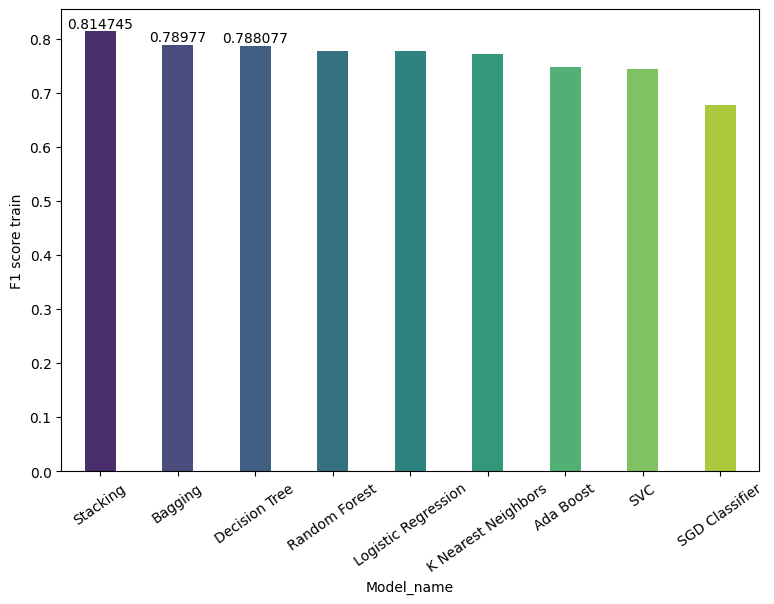

In [440]:
plt.figure(figsize=(9, 6))
ax = sns.barplot(data=result_df1, x='Model_name', y='F1 score train', palette='viridis', estimator="sum", errorbar=None, width=0.4)
ax.bar_label(ax.containers[0], fontsize=10)
ax.bar_label(ax.containers[1], fontsize=10)
ax.bar_label(ax.containers[2], fontsize=10)
plt.xticks(rotation=35);

### `5.III) roc auc`

In [455]:
# model prediction for train dataset:
# logistic regression:
y_pred_log = logistic_regression.predict_proba(x_train)[:, 1]
# roc_auc Score
rocauc_log = roc_auc_score (y_train, y_pred_log)

# SGD Classifier:
y_pred_sgd = sgd.predict_proba(x_train)[:, 1]
# roc_auc Score
rocauc_sgd = roc_auc_score (y_train, y_pred_sgd)

# SVC:
y_pred_svc = svc.predict_proba(x_train)[:, 1]
# roc_auc Score
rocauc_svc = roc_auc_score (y_train, y_pred_svc)

# KNN:
y_pred_knn = knn.predict_proba(x_train)[:, 1]
# roc_auc Score
rocauc_knn = roc_auc_score (y_train, y_pred_knn)

# Decision Tree:
y_pred_tree = d_tree2.predict_proba(x_train)[:, 1]
# roc_auc Score
rocauc_tree = roc_auc_score (y_train, y_pred_tree)

# Bagging:
y_pred_bagg = bagg.predict_proba(x_train)[:, 1]
# roc_auc Score
rocauc_bagg = roc_auc_score (y_train, y_pred_bagg)

# Random Forest:
y_pred_forest = r_forest2.predict_proba(x_train)[:, 1]
# roc_auc Score
rocauc_forest = roc_auc_score (y_train, y_pred_forest)

# Ada Boost:
y_pred_ada = ada.predict_proba(x_train)[:, 1]
# roc_auc Score
rocauc_ada = roc_auc_score (y_train, y_pred_ada)

# Stacking:
y_pred_stacking = stacking.predict_proba(x_train)[:, 1]
# roc_auc Score
rocauc_stacking = roc_auc_score (y_train, y_pred_stacking)

In [456]:
data = {'Model_name': [ 'Logistic Regression',
                     'SGD Classifier',
                     'SVC',
                     'K Nearest Neighbors',
                     'Decision Tree',
                     'Bagging',
                     'Random Forest',
                     'Ada Boost',
                     'Stacking'
                     ],

    'roc auc' : [rocauc_log, rocauc_sgd, rocauc_svc, rocauc_knn, rocauc_tree, rocauc_bagg, rocauc_forest, rocauc_ada, rocauc_stacking],
}
result_df = pd.DataFrame(data=data)
result_df

,Model_name,roc auc
0,Logistic Regression,0.832389
1,SGD Classifier,0.829821
2,SVC,0.794333
3,K Nearest Neighbors,0.839849
4,Decision Tree,0.821774
5,Bagging,0.830436
6,Random Forest,0.796251
7,Ada Boost,0.781815
8,Stacking,0.863454


In [462]:
result_df2 = result_df.sort_values(by=['roc auc'], ascending=False)
result_df2

,Model_name,roc auc
8,Stacking,0.863454
3,K Nearest Neighbors,0.839849
0,Logistic Regression,0.832389
5,Bagging,0.830436
1,SGD Classifier,0.829821
4,Decision Tree,0.821774
6,Random Forest,0.796251
2,SVC,0.794333
7,Ada Boost,0.781815


In [481]:
result_df2[:1]

,Model_name,roc auc
8,Stacking,0.863454


In [476]:
# Possible prediction
y_predproba_stacking = stacking.predict_proba(x_train)[:, 1]
y_predproba_knn = knn.predict_proba(x_train)[:, 1]
y_predproba_log = logistic_regression.predict_proba(x_train)[:, 1]

# False Positive Rate (FPR) & True Positive Rate (TPR)
fpr_stacking, tpr_stacking, thresold = roc_curve(y_train, y_predproba_stacking)
fpr_knn, tpr_knn, thresold = roc_curve(y_train, y_predproba_knn)
fpr_log, tpr_log, thresold = roc_curve(y_train, y_predproba_log)

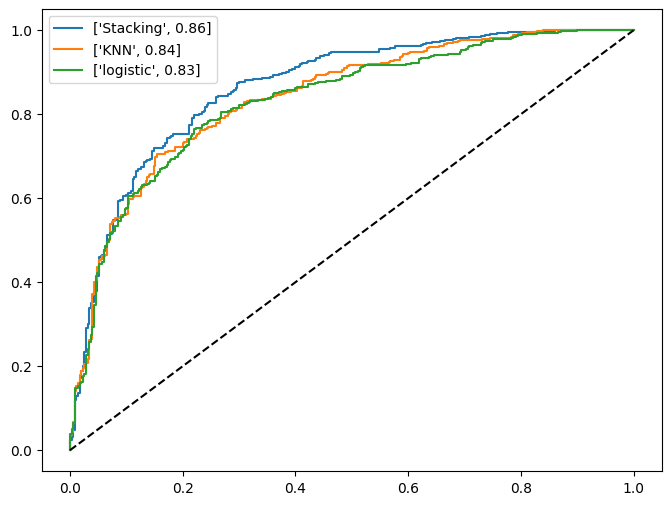

In [478]:
plt.figure(figsize=(8,6))
plt.plot(fpr_stacking, tpr_stacking, label=['Stacking', round(rocauc_stacking,2)])
plt.plot(fpr_knn, tpr_knn, label=['KNN', round(rocauc_knn,2)])
plt.plot(fpr_log, tpr_log, label=['logistic', round(rocauc_log,2)])
plt.plot([0, 1], [0, 1], 'k--')
plt.legend();

### `5.IV) Confusion Matrix`

In [479]:
from sklearn.metrics import ConfusionMatrixDisplay

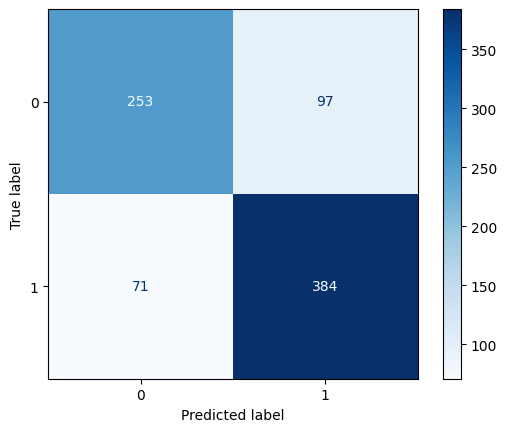

In [480]:
ConfusionMatrixDisplay.from_estimator(stacking, x_train, y_train, cmap='Blues')

# `6) Finally`


داده های تست رو به بهترین مدلی که ساختیم میدیم

 stacking: --> f1 score: 0.814 | roc auc : 0.863

In [484]:
print(result_df1[:1])
print('-'*100)
print(result_df2[:1])

  Model_name  F1 score train  F1 score validation  difference
8   Stacking        0.814745              0.79183    0.022915
----------------------------------------------------------------------------------------------------
  Model_name   roc auc
8   Stacking  0.863454


In [489]:
# model prediction
pred_test= stacking.predict(x_test)
predproba_test = stacking.predict_proba(x_test)[:, 1]

# accuracy
acc_stacking_test = accuracy_score(y_test, pred_test)

# roc_auc Score
rocauc_stacking_test = roc_auc_score (y_test, pred_test)
# F1 Score
f1_stacking_test = f1_score(y_test, pred_test)
# Precision Score
precision_stacking_test = precision_score(y_test, pred_test)
# Recall Score
recall_stacking_test = recall_score(y_test, pred_test)

# False Positive Rate (FPR) & True Positive Rate (TPR)
fpr_stacking_test, tpr_stacking_test, thresold = roc_curve(y_test, predproba_test)


In [490]:
data2 = {'Model_name': ['Stacking Test Dataset'],
    'accuracy' : [acc_stacking_test],
    'F1_score' : [f1_stacking_test],
    'precision' : [precision_stacking_test],
    'recall' : [recall_stacking_test],
    'roc_auc' : [rocauc_stacking_test]
       }
result_df2 = pd.DataFrame(data=data2)
result_df2

,Model_name,accuracy,F1_score,precision,recall,roc_auc
0,Stacking Test Dataset,0.782178,0.811966,0.748031,0.88785,0.775504


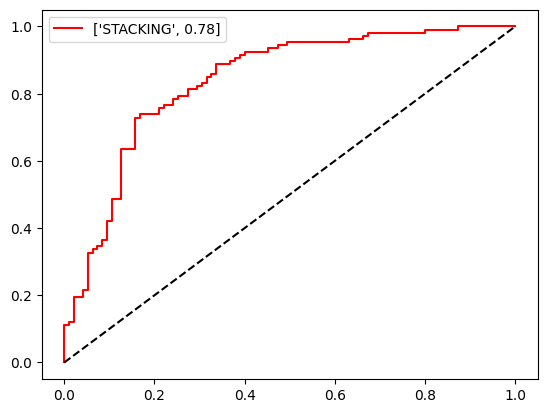

In [491]:
plt.plot(fpr_stacking_test, tpr_stacking_test, c='r', label=['STACKING', round(rocauc_stacking_test,2)])
plt.plot([0, 1], [0, 1], 'k--')
plt.legend();

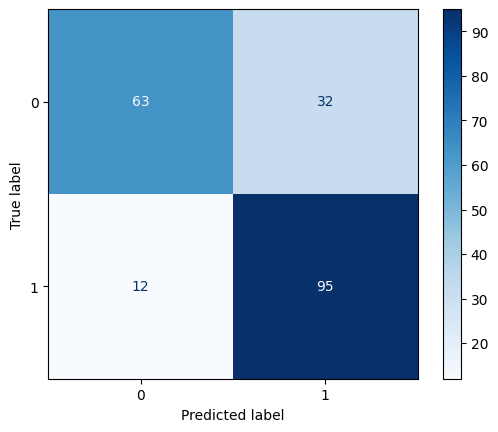

In [492]:
ConfusionMatrixDisplay.from_estimator(stacking, x_test, y_test, cmap='Blues');

# `7) +`


 میخوایم ببینیم بر اساس درخت تصمیم کدوم ویژگی ها تاثیر بیشتری روی تاگت دارن

In [ ]:
# یدونه کپی از دیتاست اصلی میگیریم چون میخوایم تغییرش بدیم
dataframe = df.copy()

In [ ]:
# تغییر مقادیر به دسته بندی
dataframe['job'] = dataframe['job'].astype('category').cat.codes
dataframe['marital'] = dataframe['marital'].astype('category').cat.codes
dataframe['education'] = dataframe['education'].astype('category').cat.codes
dataframe['contact'] = dataframe['contact'].astype('category').cat.codes
dataframe['pdays'] = dataframe['pdays'].astype('category').cat.codes
dataframe['month'] = dataframe['month'].astype('category').cat.codes
dataframe['default'] = dataframe['default'].astype('category').cat.codes
dataframe['loan'] = dataframe['loan'].astype('category').cat.codes
dataframe['housing'] = dataframe['housing'].astype('category').cat.codes
dataframe['duration'] = dataframe['duration'].astype('category').cat.codes
dataframe['balance'] = dataframe['balance'].astype('category').cat.codes
dataframe['campaign'] = dataframe['campaign'].astype('category').cat.codes

In [ ]:
display(dataframe.head())
dataframe.shape

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,y
367,28,1,2,1,0,231,1,0,0,4,5,998,2,0,0,1
368,55,1,1,1,0,363,1,0,0,7,5,490,3,0,0,1
369,51,9,1,1,0,529,0,0,0,7,5,611,1,0,0,1
370,39,9,2,1,0,815,1,0,0,7,5,713,1,0,0,1
371,42,1,0,0,0,526,1,0,0,7,5,430,2,0,0,1


(8393, 16)

In [ ]:
# Train Test Split
X = dataframe.drop('y', axis=1)
y = dataframe['y']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.9, random_state=42)
x_train.shape

(839, 15)

In [ ]:
# Creat Decision Tree
tree = DecisionTreeClassifier(criterion='gini', class_weight='balanced', min_weight_fraction_leaf = 0.01, random_state=42)
tree = tree.fit(x_train, y_train)
tree

DecisionTreeClassifier(class_weight='balanced', min_weight_fraction_leaf=0.01,
                       random_state=42)

In [ ]:
importances = tree.feature_importances_
feature_names = dataframe.drop('y', axis=1).columns
indices = np.argsort(importances)[::-1]

In [ ]:
# Feature Ranking
print("Feature ranking:")
for f in range(x_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

Feature ranking:
1. feature 11 (0.452322)
2. feature 6 (0.116177)
3. feature 5 (0.082488)
4. feature 14 (0.074918)
5. feature 10 (0.073016)
6. feature 13 (0.060999)
7. feature 0 (0.051521)
8. feature 9 (0.037978)
9. feature 12 (0.020854)
10. feature 1 (0.012881)
11. feature 3 (0.009108)
12. feature 2 (0.007739)
13. feature 8 (0.000000)
14. feature 7 (0.000000)
15. feature 4 (0.000000)


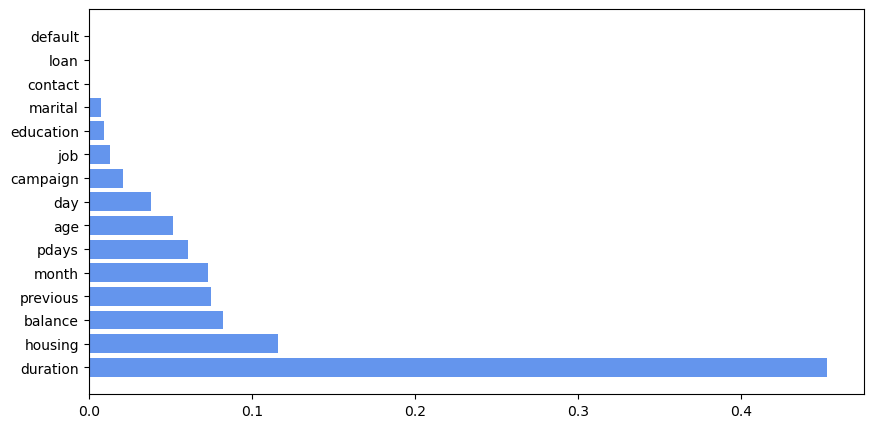

In [ ]:
plt.figure(figsize=(10,5))
plt.barh(range(len(indices)), importances[indices], color='cornflowerblue')
plt.yticks(range(len(indices)), feature_names[indices], rotation='horizontal',fontsize=10);


duratuin - housing - balance

بیشترین تاثیر رو روی تارگت دارن.


# `8) Neural Network with Keras(google colab)`

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

In [ ]:
model = Sequential()
n_cols = x_train.shape[1]
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
y_train.shape

(805, 2)

In [ ]:
model.add(Dense(8, activation='relu', input_shape=(n_cols,)))
model.add(Dense(5, activation='relu'))
model.add(Dense(2, activation='softmax'))

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=[keras.metrics.F1Score()])

In [ ]:
model.fit(x_train, y_train, epochs=100, validation_split=0.3)

Epoch 1/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - f1_score: 0.3557 - loss: 0.6899 - val_f1_score: 0.3529 - val_loss: 0.6761
Epoch 2/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - f1_score: 0.3493 - loss: 0.6679 - val_f1_score: 0.3529 - val_loss: 0.6579
Epoch 3/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - f1_score: 0.3662 - loss: 0.6390 - val_f1_score: 0.3529 - val_loss: 0.6421
Epoch 4/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - f1_score: 0.3410 - loss: 0.6304 - val_f1_score: 0.3529 - val_loss: 0.6291
Epoch 5/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - f1_score: 0.3509 - loss: 0.6078 - val_f1_score: 0.3529 - val_loss: 0.6174
Epoch 6/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - f1_score: 0.3790 - loss: 0.5837 - val_f1_score: 0.6552 - val_loss: 0.6055
Epoch 7/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - f1_score: 0.7676 - loss: 0.5827 - val_f1_score: 0.6964 - val_loss: 0.5951
Epoch 8/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - f1_score: 0.7868 - loss: 0.5384 - val_f1_score: 0.7168 - 

In [ ]:
model.evaluate(x_train, y_train, verbose=0)

[0.4319150447845459,
 <tf.Tensor: shape=(2,), dtype=float32, numpy=array([0.7826086 , 0.83695644], dtype=float32)>]

In [ ]:
pred_train = model.predict(x_train)

26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


In [ ]:
metric = keras.metrics.F1Score()

In [ ]:
metric.update_state(y_train, pred_train)

In [ ]:
result = metric.result()

In [ ]:
result

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([0.7826086 , 0.83695644], dtype=float32)>

In [ ]:
pred_train

array([[0.57758564, 0.4224144 ],
       [0.9175956 , 0.08240439],
       [0.9356278 , 0.06437217],
       ...,
       [0.9348497 , 0.06515037],
       [0.9207328 , 0.07926721],
       [0.6128163 , 0.38718367]], dtype=float32)